# Credit Risk Scoring Case Study

## Business Understanding

### Problem Statement:

* **Objective**: Assess credit default risk before approving a customer's loan application
* **Approach**: Analyze historical customer records according to whether they were able to repay their loan (`OK`) or whether they were unable to repay their loan (`default`). Predict the probability of credit default for a new customer before the credit is approved.
* **Binary Classification Problem**
** OK = 1
** Default = 0


Dataset source: Ploytechnic University of Catalonia (https://www.cs.upc.edu/~belanche/Docencia/mineria/mineria.html)

## Data Cleaning & Feature Engineering

What we did in the previous sessions:

0. Exploratory data analysis (descriptive stats, box-plot, histogram, correlation matrix etc.)

1. Removing rows with missing values.

2. Correcting the extreme values.

3. Identifying the numerical columns (for scaling like min-max scaling and transformation like box-cox).

4. Identifying the categorical columns (for encoding like one-hot for nominal features or label encoding for ordinal features).

5. Spliting data into train and test split. 


PS: Some algorithms such as Linear/logistic regression require feature scaling and transformation (i.e., from skewed to normal distribution) while others do not need. Similarly, some are very sensitive to outliers and missing values while others are not.


In [18]:

import pandas as pd 
import numpy as np


y_test = pd.read_csv('y_test.csv',index_col=0)['Status']
X_test_fe = pd.read_csv('X_test_fe.csv',index_col=0)

y_train = pd.read_csv('y_train.csv',index_col=0)['Status']
X_train_fe = pd.read_csv('X_train_fe.csv',index_col=0)

In [19]:
# check the target variable
y_train.head()

734     default
981          ok
452     default
4120         ok
4218         ok
Name: Status, dtype: object

In [20]:
# check the features 
X_train_fe.head()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Home_unknown,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,30,18,57,75,290.0,0.0,0.0,350,450,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6,18,33,35,163.0,6000.0,0.0,1200,2022,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,36,21,45,100.0,0.0,0.0,700,825,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,48,36,75,214.0,10000.0,0.0,1143,1143,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,10,36,47,45,60.0,5000.0,0.0,250,1343,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Decision Tree

### Training

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=3)

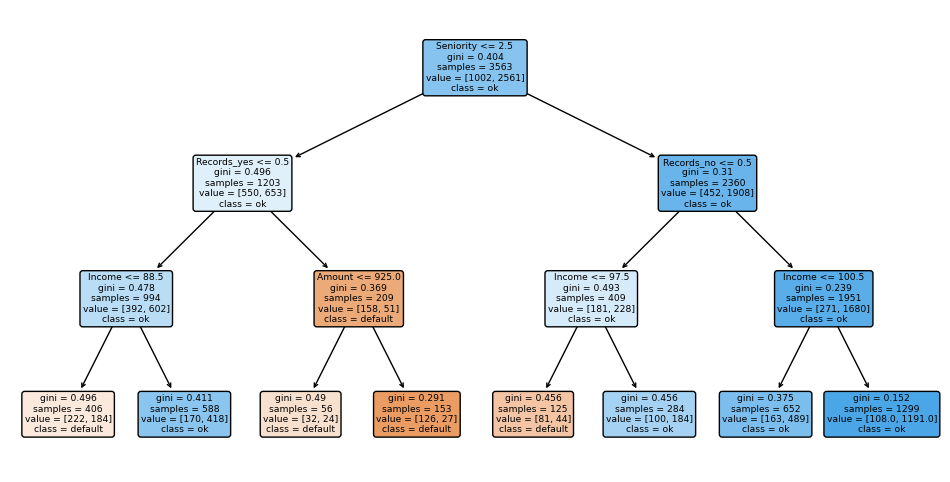

In [24]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
plot_tree(dt, feature_names = X_train_fe.columns.tolist(), 
          class_names = y_train.unique().tolist(),
          filled = True,
          rounded = True); 

In [25]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names = list(X_train_fe.columns))
print(tree_rules)

|--- Seniority <= 2.50
|   |--- Records_yes <= 0.50
|   |   |--- Income <= 88.50
|   |   |   |--- class: default
|   |   |--- Income >  88.50
|   |   |   |--- class: ok
|   |--- Records_yes >  0.50
|   |   |--- Amount <= 925.00
|   |   |   |--- class: default
|   |   |--- Amount >  925.00
|   |   |   |--- class: default
|--- Seniority >  2.50
|   |--- Records_no <= 0.50
|   |   |--- Income <= 97.50
|   |   |   |--- class: default
|   |   |--- Income >  97.50
|   |   |   |--- class: ok
|   |--- Records_no >  0.50
|   |   |--- Income <= 100.50
|   |   |   |--- class: ok
|   |   |--- Income >  100.50
|   |   |   |--- class: ok



### Evaluation

Score on training data

In [29]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_train_fe)
print(f'The trainng accuracy is: {accuracy_score(y_train, y_pred)}')

The trainng accuracy is: 0.7698568621947797


__We cannot trust the training accuracy. The model can overfit.__

Score on testing data

In [31]:
y_pred = dt.predict(X_test_fe)
print(f'The test accuracy is: {accuracy_score(y_test, y_pred)}')

The test accuracy is: 0.7575757575757576


__When comparing the test and train accuracies, what conclusion can you draw__ ?

## Random Forest

### Training

Random Forest with Scikit-learn

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 8, oob_score = True)
rf.fit(X_train_fe, y_train)

RandomForestClassifier(max_depth=8, oob_score=True)

Check Out-Of-Bag Score

In [36]:
rf.oob_score_

0.7883805781644682

Inspect trees

In [37]:
rf.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1803432188),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=2134281018),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=680608376),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1055046352),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1098450009),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1488468794),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=168754724),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=659193322),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1597489581),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=840225290),
 DecisionTreeClassif

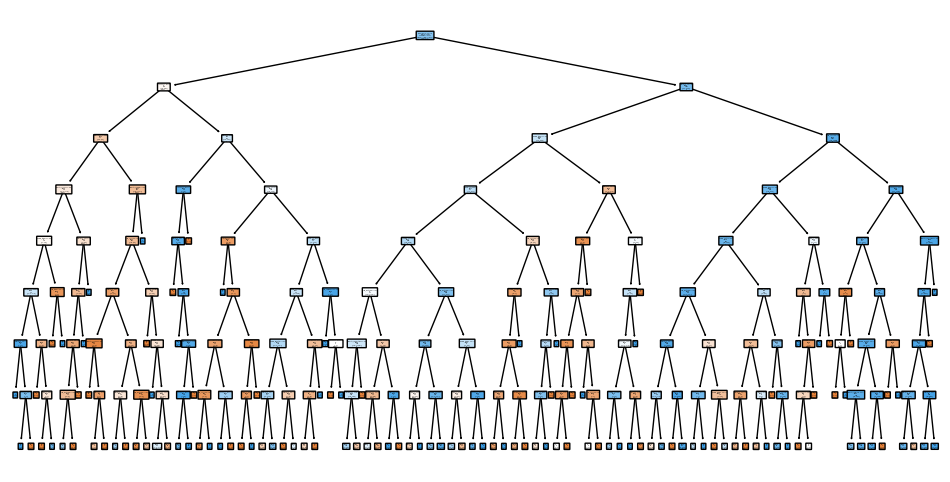

In [38]:
plt.figure(figsize = (12,6))
plot_tree(rf.estimators_[10], feature_names = X_train_fe.columns,label = 'root', 
          class_names = y_train.unique(),
          filled = True,
          rounded = True); 


Grid search

In [39]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# Define grid
parameters = {'n_estimators': [10, 20, 50, 100], 'max_depth': [5, 6, 9, 12, 15]}

k = 5
grid_search = GridSearchCV(model, parameters, cv = k, scoring = "roc_auc")
grid_search.fit(X_train_fe, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 9, 12, 15],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [40]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.296734,0.008216,0.018262,0.005068,12,100,"{'max_depth': 12, 'n_estimators': 100}",0.839873,0.880684,0.830302,0.814668,0.807393,0.834584,0.025720,1
11,0.254524,0.005386,0.014416,0.000710,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.840796,0.875738,0.831170,0.818701,0.805908,0.834463,0.023742,2
7,0.201411,0.012095,0.008080,0.008543,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.840232,0.878323,0.832729,0.817959,0.801191,0.834087,0.025841,3
6,0.100551,0.009634,0.008944,0.004734,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.836997,0.871891,0.834513,0.816816,0.797412,0.831526,0.024691,4
10,0.131141,0.006302,0.008915,0.002103,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.841330,0.876642,0.827573,0.810937,0.800010,0.831299,0.026699,5
19,0.330582,0.013805,0.016972,0.003631,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.832007,0.871784,0.824532,0.813604,0.807734,0.829932,0.022558,6
14,0.155049,0.004538,0.008971,0.005193,12,50,"{'max_depth': 12, 'n_estimators': 50}",0.842861,0.871832,0.820858,0.813057,0.800752,0.829872,0.025065,7
3,0.184661,0.003620,0.010930,0.003368,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.832002,0.871580,0.829552,0.812627,0.795000,0.828152,0.025467,8
2,0.092246,0.002502,0.007045,0.000357,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.829621,0.870622,0.831881,0.814434,0.791934,0.827698,0.025763,9
9,0.052798,0.005826,0.003127,0.006253,9,20,"{'max_depth': 9, 'n_estimators': 20}",0.831623,0.862310,0.828333,0.812842,0.791240,0.825270,0.023384,10


Retrain on full data set

In [41]:
# Retrain on full dataset
rf = grid_search.best_estimator_
rf.fit(X_train_fe, y_train)

RandomForestClassifier(max_depth=12)

### Evaluation

Test set performance

In [43]:
y_pred = rf.predict(X_test_fe)
print(f'The test accuracy is: {accuracy_score(y_test, y_pred)}')

The test accuracy is: 0.7845117845117845


### Feature Importance

#### PDP - Partial Dependence Plots

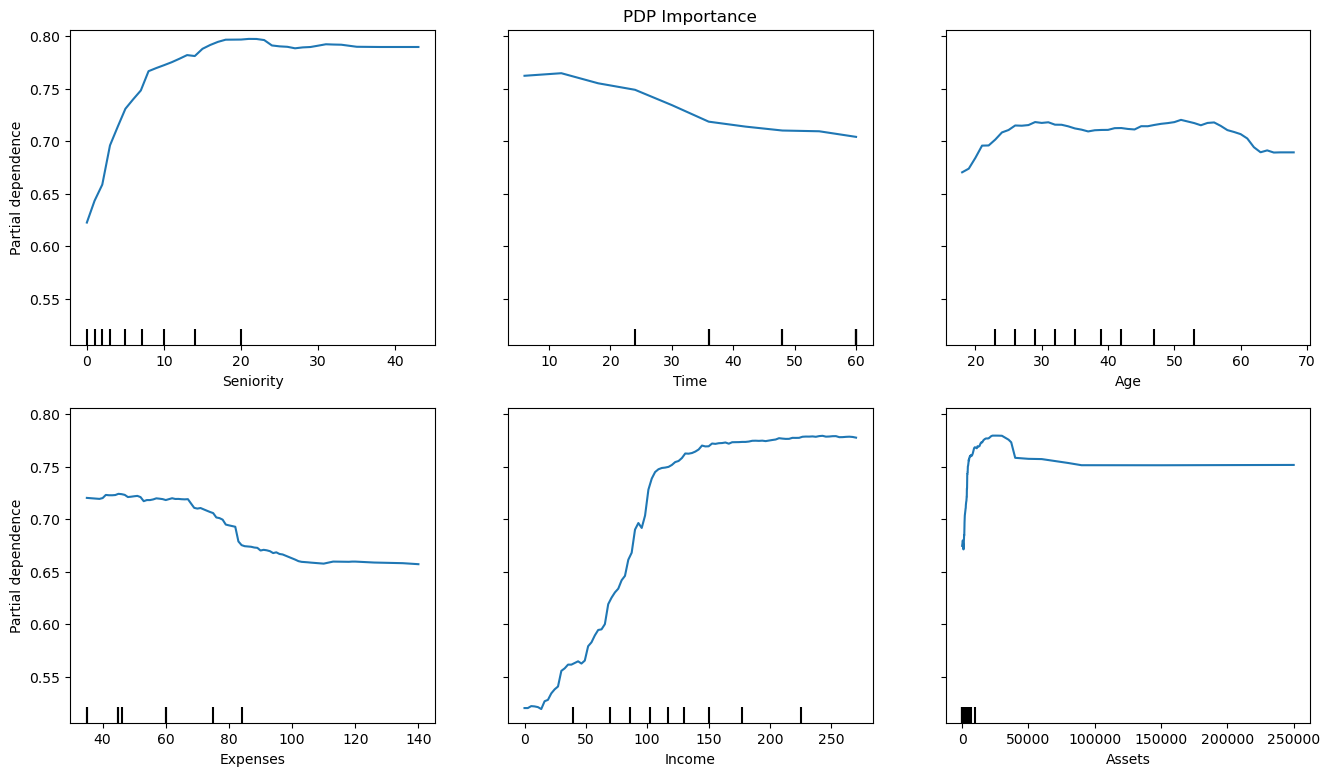

In [44]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[:6]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

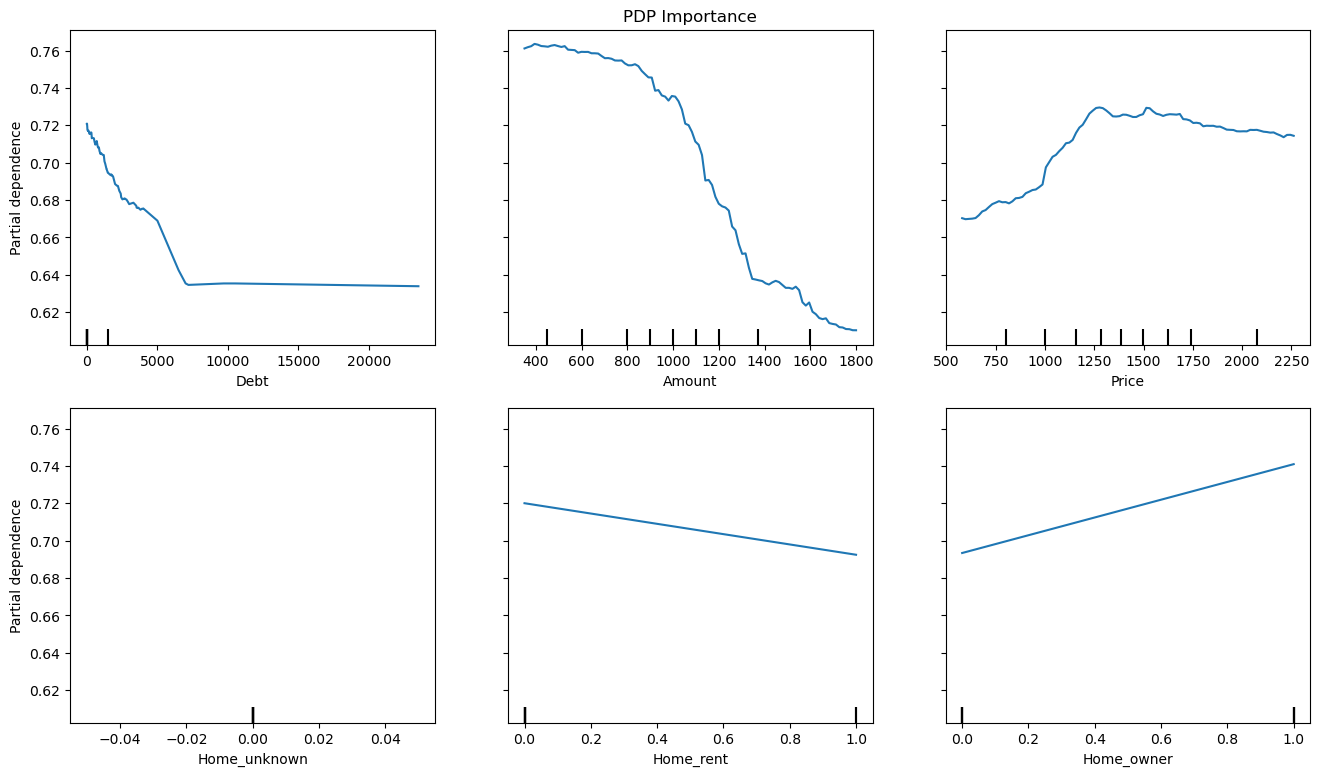

In [45]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[6:12]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

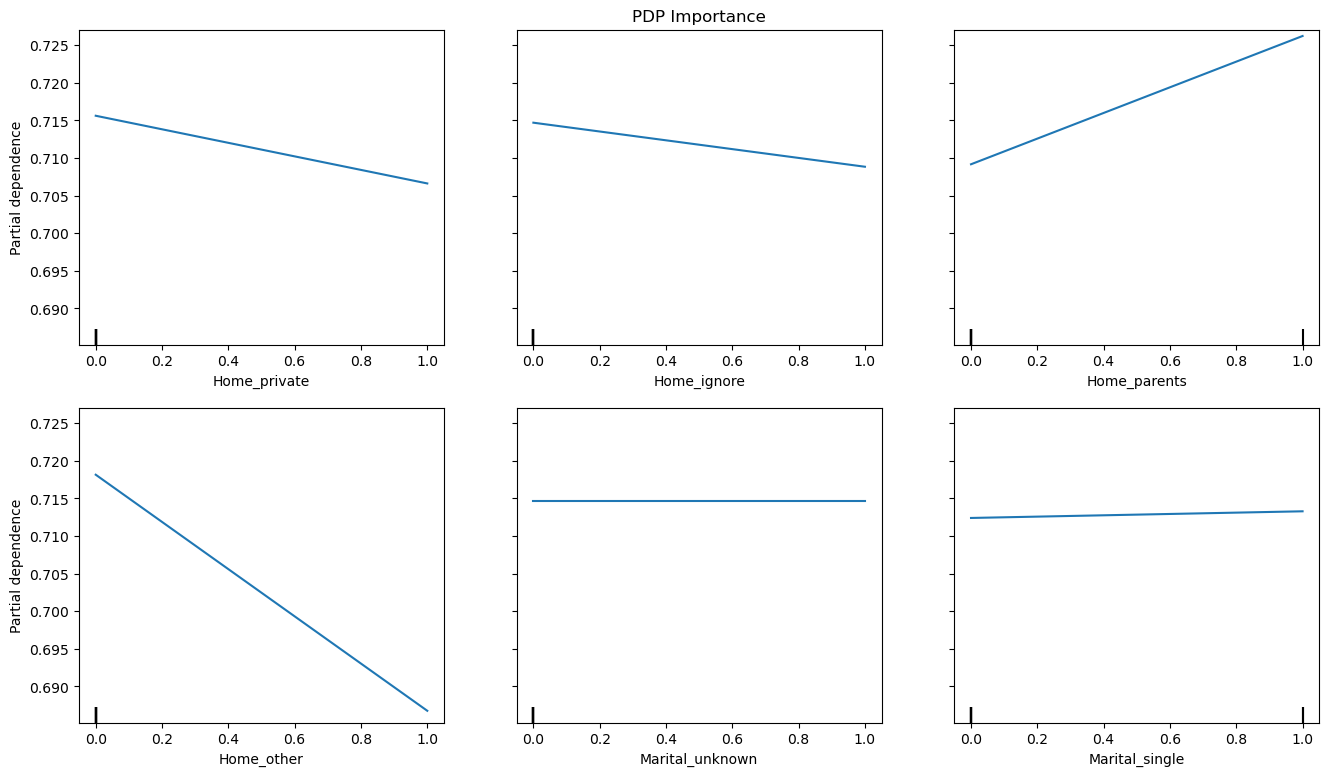

In [46]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[12:18]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

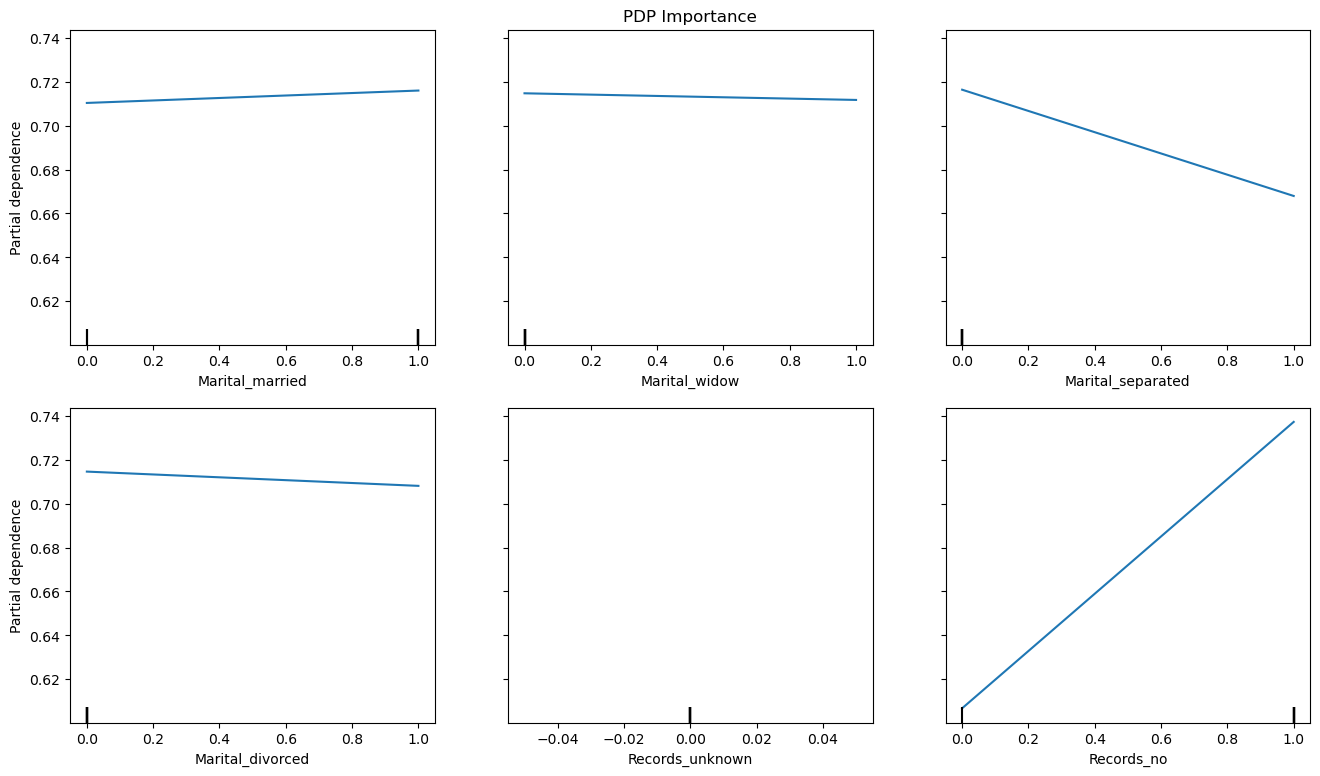

In [47]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[18:24]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

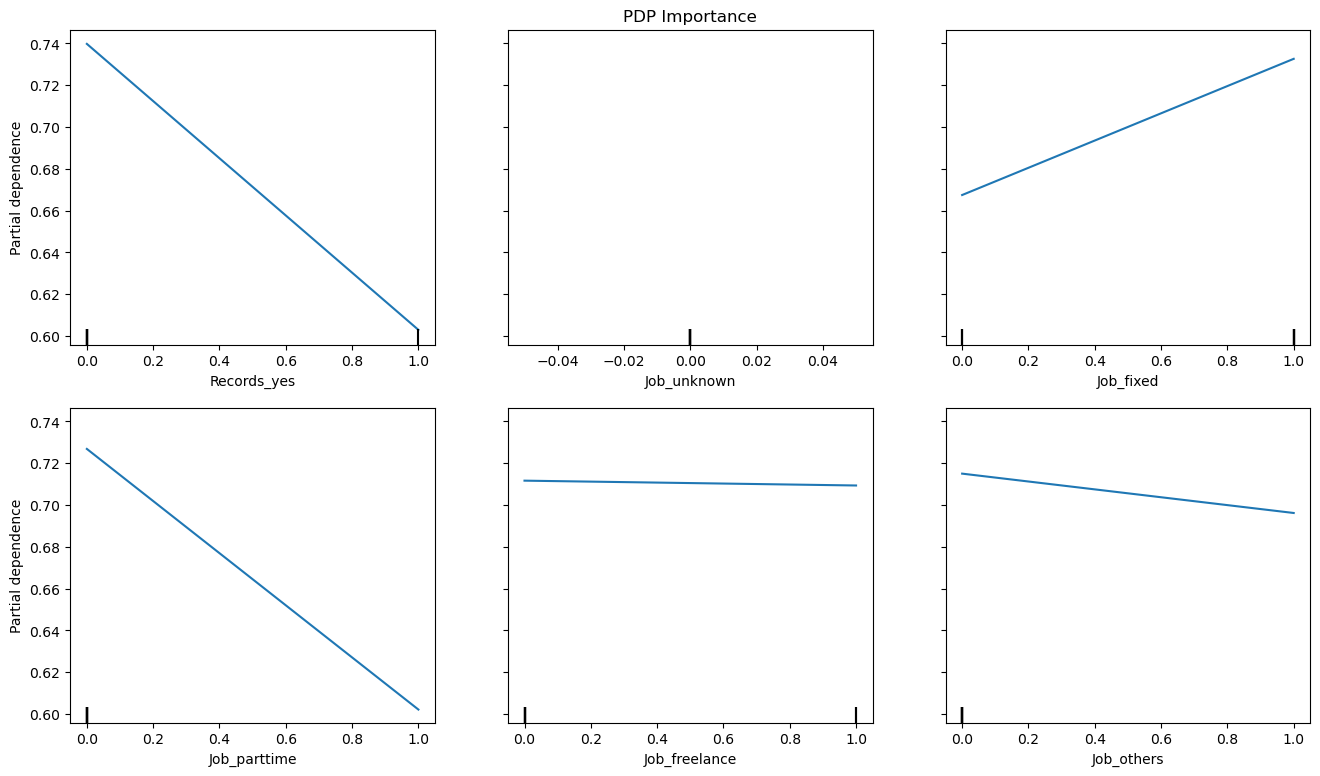

In [48]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[24:30]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

### Permutation Feature Importance

In [49]:
from sklearn.inspection import permutation_importance

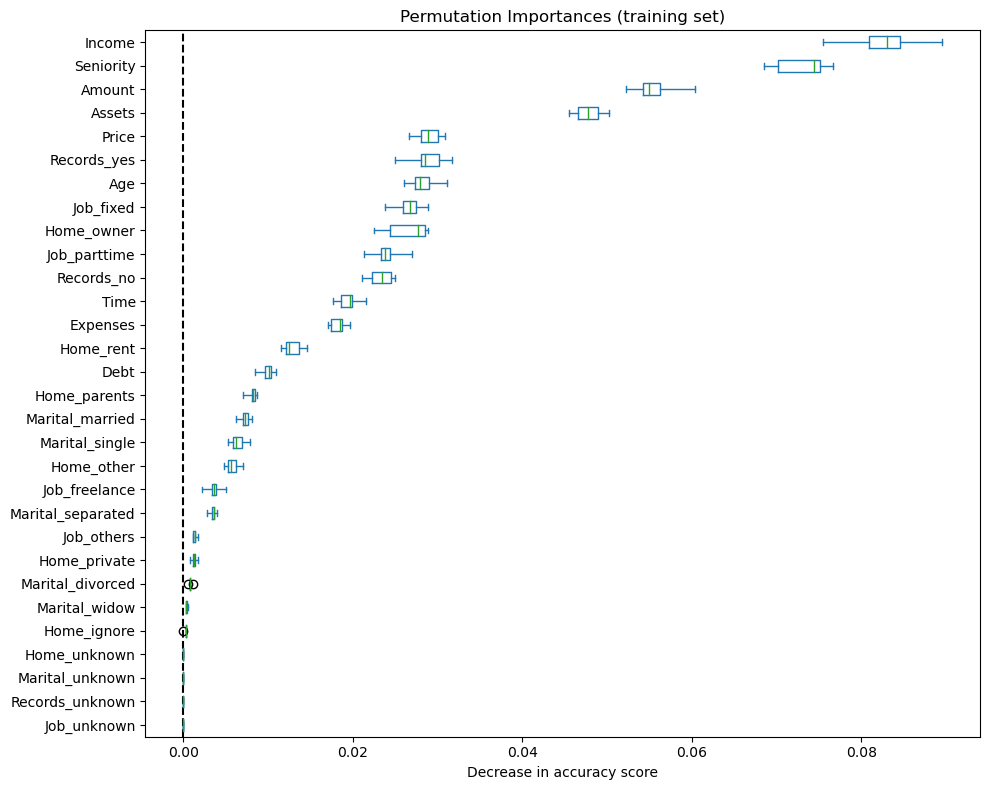

In [50]:
result = permutation_importance(rf, X_train_fe, y_train, n_repeats=10, random_state=123)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train_fe.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10, figsize = (10,8))
ax.set_title("Permutation Importances (training set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## Boosting - AdaBoost and Gradient Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train_fe, y_train)



c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [53]:
y_pred = ab.predict(X_test_fe)
print(f'The test accuracy is: {accuracy_score(y_test, y_pred)}')

The test accuracy is: 0.8024691358024691


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators = 100)
gb.fit(X_train_fe, y_train)

GradientBoostingClassifier()

In [55]:
y_pred = gb.predict(X_test_fe)
print(f'The test accuracy is: {accuracy_score(y_test, y_pred)}')

The test accuracy is: 0.7856341189674523


## Boosting - XGBoost

In [57]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 682.7 kB/s eta 0:02:27
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 590.8 kB/s eta 0:02:49
   ---------------------------------------- 0.2/99.8 MB 807.1 kB/s eta 0:02:04
   ---------------------------------------- 0.3/99.8 MB 1.0 MB/s eta 0:01:38
   ---------------------------------------- 0.4/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.6/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 1.0/99.8 MB 2.4 MB/s eta 0:00:42
    ------------------

In [58]:
import xgboost as xgb

Encode target to numierc

In [59]:
status_enc = {
    'default': 0,
    'ok': 1
}

y_train_enc = y_train.map(status_enc)

print(y_train[:5], y_train_enc[:5])

734     default
981          ok
452     default
4120         ok
4218         ok
Name: Status, dtype: object 734     0
981     1
452     0
4120    1
4218    1
Name: Status, dtype: int64


Create `DMatrix`

In [60]:
train_dm = xgb.DMatrix(X_train_fe, y_train_enc, feature_names=list(X_train_fe.columns))

Set XGBoost hyper parameters

In [61]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'silent': 1
}

### Train Model

Check performance with cross-validation

In [73]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'error'}, seed=123)
cv_results

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.281224,0.003416,0.281222,0.013658
1,0.281224,0.003416,0.281222,0.013658
2,0.281224,0.003416,0.281222,0.013658
3,0.264946,0.005446,0.267749,0.020251
4,0.245860,0.002480,0.261293,0.015738
...,...,...,...,...
495,0.000561,0.000281,0.218068,0.011868
496,0.000561,0.000281,0.218068,0.011599
497,0.000561,0.000281,0.218068,0.011436
498,0.000491,0.000281,0.218349,0.011336


In [76]:
1.0-np.max(cv_results['test-error-mean'])

0.7187784641568307

Good, but let's try to get even better --> Tune hyperparameters

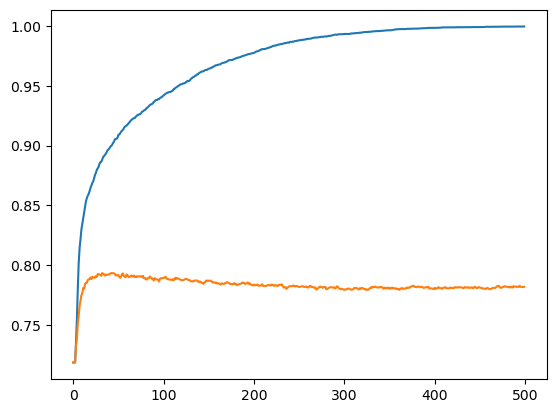

In [77]:
plt.plot(1.-cv_results['train-error-mean'])
plt.plot(1.-cv_results['test-error-mean']);

### Hyperparameter tuning

* `eta` -> learning rate
* `max_depth`-> maximum allowed depth for each tree
* `min_child_weight` -> Minimal number of observation in each group (same as `min_leaf_size`)

### Hyperparameter tuning

#### Learning rate

In [79]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:01:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


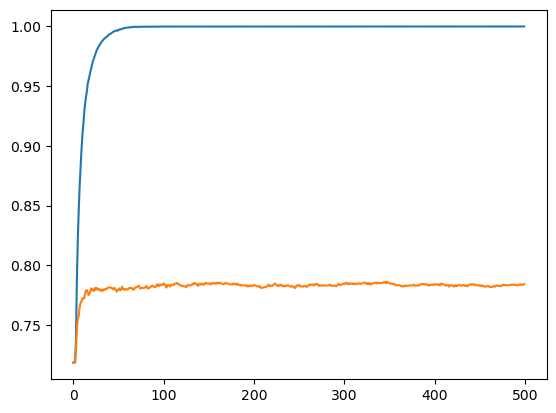

In [116]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'error'}, seed=123)
plt.plot(1.-cv_results['train-error-mean'])
plt.plot(1.-cv_results['test-error-mean']);

In [82]:
1.0 - np.max(cv_results['test-error-mean'])

0.7187784641568307

In [83]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:54:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


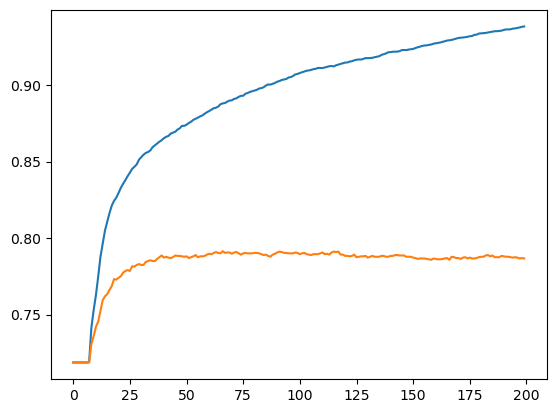

In [87]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'error'}, seed=123)
plt.plot(1.-cv_results['train-error-mean'])
plt.plot(1.-cv_results['test-error-mean']);

In [86]:
1.0 - np.max(cv_results['test-error-mean'])

0.7187784641568307

#### Maximum Depth

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:54:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


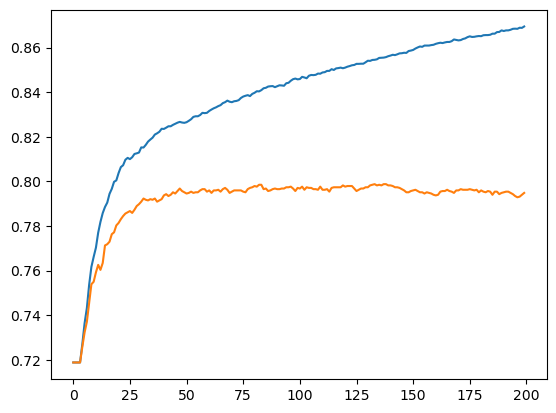

In [88]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'error'}, seed=123)
plt.plot(1.-cv_results['train-error-mean'])
plt.plot(1.-cv_results['test-error-mean']);

In [89]:
np.max(cv_results['test-error-mean'])

0.2812215358431694

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:01:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


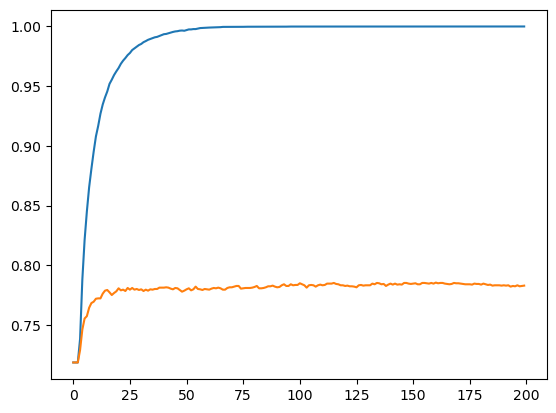

In [115]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 12,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'error'}, seed=123)
plt.plot(1.-cv_results['train-error-mean'])
plt.plot(1.-cv_results['test-error-mean']);

In [ ]:
1.-np.max(cv_results['test-auc-mean'])

#### Leaf size

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


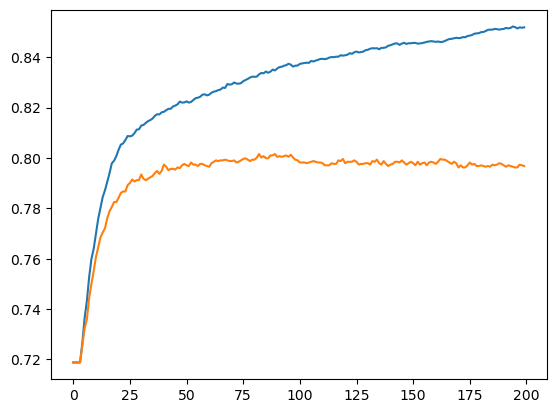

In [117]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'error'}, seed=123)
plt.plot(1.-cv_results['train-error-mean'])
plt.plot(1.-cv_results['test-error-mean']);

In [118]:
1.-np.max(cv_results['test-error-mean'])

0.7187784641568307

c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:55:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


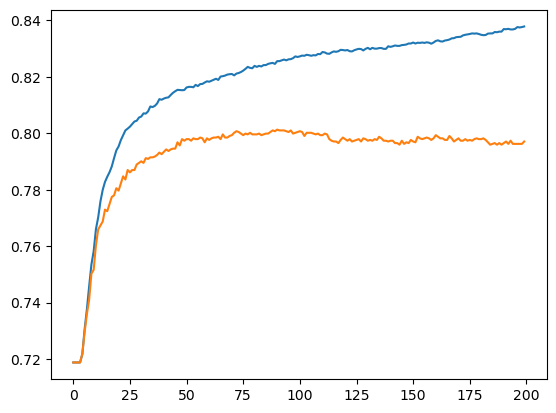

In [94]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'error'}, seed=123)
plt.plot(1.0- cv_results['train-error-mean'])
plt.plot(1.0-cv_results['test-error-mean']);

In [96]:
1.0-np.max(cv_results['test-error-mean'])

0.7187784641568307

#### Retrain on full data

In [100]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 1,
    'silent': 1
}

Add watchlist for training

In [101]:
watchlist = [(train_dm, 'train')]

In [102]:
xgb_model =  xgb.train(xgb_params, 
                 train_dm, 
                 num_boost_round = 100, 
                 evals = watchlist, 
                 verbose_eval = 10 )

[0]	train-error:0.28122
[10]	train-error:0.23604
[20]	train-error:0.20741
[30]	train-error:0.19169
[40]	train-error:0.18720
[50]	train-error:0.18524
[60]	train-error:0.18271
[70]	train-error:0.17822
[80]	train-error:0.17766
[90]	train-error:0.17626
[99]	train-error:0.17317


c:\Users\Rina\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


### Evaluate on test set

#### Data processing for test set

In [103]:
y_test_enc = y_test.map(status_enc)
print(y_test[:5], y_test_enc[:5])

4171    default
1912         ok
2546    default
2613         ok
15           ok
Name: Status, dtype: object 4171    0
1912    1
2546    0
2613    1
15      1
Name: Status, dtype: int64


In [104]:
test_dm = xgb.DMatrix(X_test_fe, y_test_enc, feature_names=list(X_test_fe.columns))

In [105]:
y_pred = xgb_model.predict(test_dm)
y_pred[:5]

array([0.9532038 , 0.992747  , 0.17586356, 0.325344  , 0.9298945 ],
      dtype=float32)

In [109]:
y_pred_bin = y_pred>0.5

In [111]:
accuracy_score(y_test_enc, y_pred_bin)

0.7968574635241302

#### Feature importance

Feature weights

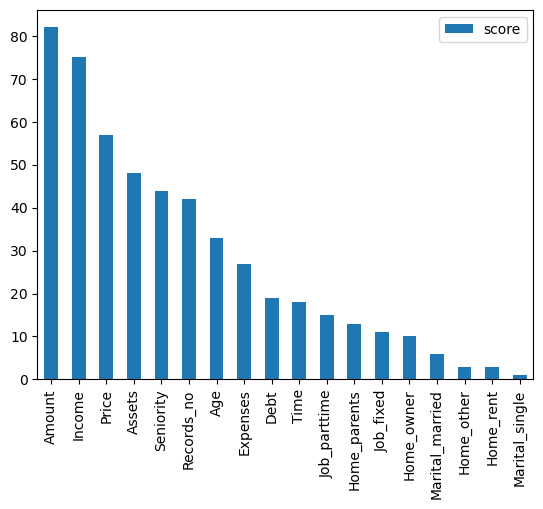

In [112]:
feature_importance = xgb_model.get_score(importance_type='weight')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

feature_importance_df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance_df.plot(kind = 'bar');

Partial Dependence Plots

In [113]:
def partial_dependence_score(xgboost_model, X, y, col, values):
    results = []
    for value in values:
        X_copy = X.copy()
        X_copy[col] = value
        y_mean = np.mean(xgboost_model.predict(xgb.DMatrix(X_copy, y, feature_names=list(X_copy.columns))))
        results.append(y_mean)
    return np.array(results)

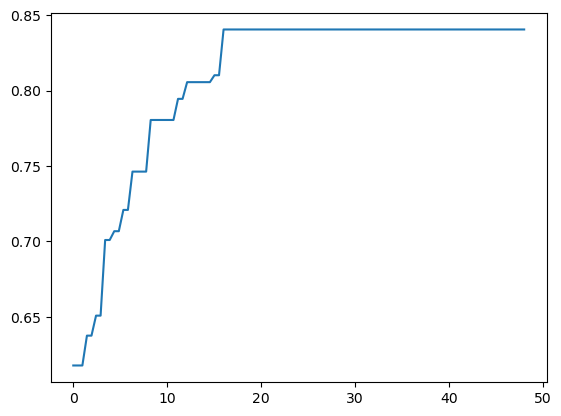

In [114]:
pdp_feature_name = 'Seniority'
pdp_feature = np.linspace(X_train_fe[pdp_feature_name].min(), X_train_fe[pdp_feature_name].max(), 100)

avg_pd = partial_dependence_score(xgb_model, X_train_fe, y_train_enc, pdp_feature_name, pdp_feature)

plt.plot(pdp_feature, avg_pd)
plt.show() 